In [9]:
from theory.linear_algebra import dot, Vector

def predict(x: Vector, beta: Vector) -> float:
    return dot(x, beta)

# тут х будет списком векторов, каждый из которых выглядит следующим образом:
[1,     # константа
 49,    # число друзей
 4,     # рабочие часы в день
 0]     # не имеет ученой степени

[1, 49, 4, 0]

### Используем градиентный спуск

In [2]:
from typing import List

def error(x: Vector, y: float, beta: Vector) -> float:
    return predict(x, beta) - y

def squared_error(x: Vector, y: float, beta: Vector) -> float:
    return error(x, y, beta) ** 2

x = [1, 2, 3]
y = 30
beta = [4, 4, 4]        # поэтому предсказание равно 4 + 8 + 12 = 24

assert error(x, y, beta) == -6
assert squared_error(x, y, beta) == 36

### Вычисление градиента

In [3]:
def sqerror_gradient(x: Vector, y: float, beta: Vector) -> Vector:
    err = error(x, y, beta)
    return [2 * err * x_i for x_i in x]

assert sqerror_gradient(x, y, beta) == [-12, -24, -36]

### Функция подгонки наименьшими квадратами

In [4]:
import random
import tqdm
from theory.linear_algebra import vector_mean
from gradient_descent import gradient_step

def least_squares_fit(xs: List[Vector],
                      ys: List[float],
                      learning_rate: float = 0.001,
                      num_steps: int = 1000,
                      batch_size: int = 1) -> Vector:
    """Отыскать beta, который минимизирует сумму квадратов ошибок,
       исходя из того, что модель y = dot(x, beta)"""
    
    # Начать со случайной догадки
    guess = [random.random() for _ in xs[0]]

    for _ in tqdm.tgrange(num_steps, desc="least squares fit"):
        for start in range(0, len(xs), batch_size):
            batch_xs = xs[start:start+batch_size]
            batch_ys = ys[start:start+batch_size]

            gradient = vector_mean([sqerror_gradient(x, y, guess)
                                    for x, y in zip(batch_xs, batch_ys)])
            guess = gradient_step(guess, gradient, -learning_rate)

    return guess


0 [-2.2937382123763186, -4.328656267521121, 2.2434808612507875]
1 [-2.247863448128792, -4.242083142170699, 2.1986112440257717]
2 [-2.202906179166216, -4.157241479327285, 2.1546390191452565]
3 [-2.158848055582892, -4.074096649740739, 2.1115462387623514]
4 [-2.1156710944712342, -3.9926147167459245, 2.0693153139871043]
5 [-2.0733576725818095, -3.912762422411006, 2.027929007707362]
6 [-2.0318905191301733, -3.834507173962786, 1.987370427553215]
7 [-1.9912527087475698, -3.75781703048353, 1.9476230190021506]
8 [-1.9514276545726184, -3.6826606898738596, 1.9086705586221075]
9 [-1.9123991014811659, -3.6090074760763824, 1.8704971474496654]
10 [-1.8741511194515426, -3.536827326554855, 1.833087204500672]
11 [-1.8366680970625118, -3.466090780023758, 1.7964254604106586]
12 [-1.7999347351212616, -3.396768964423283, 1.7604969512024455]
13 [-1.7639360404188362, -3.328833585134817, 1.7252870121783965]
14 [-1.7286573196104595, -3.2622569134321204, 1.6907812719348285]
15 [-1.6940841732182503, -3.1970117751

### Используем на наших данных

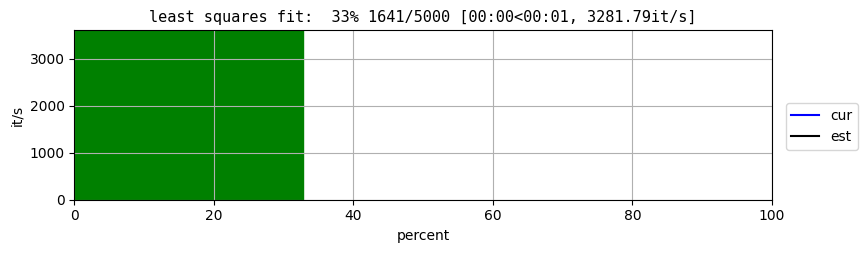

In [8]:
from istatistics import daily_minutes_good
from gradient_descent import gradient_step

random.seed(0)

inputs: List[List[float]] = [[1.,49,4,0],[1,41,9,0],[1,40,8,0],[1,25,6,0],[1,21,1,0],[1,21,0,0],[1,19,3,0],[1,19,0,0],[1,18,9,0],[1,18,8,0],[1,16,4,0],[1,15,3,0],[1,15,0,0],[1,15,2,0],[1,15,7,0],[1,14,0,0],[1,14,1,0],[1,13,1,0],[1,13,7,0],[1,13,4,0],[1,13,2,0],[1,12,5,0],[1,12,0,0],[1,11,9,0],[1,10,9,0],[1,10,1,0],[1,10,1,0],[1,10,7,0],[1,10,9,0],[1,10,1,0],[1,10,6,0],[1,10,6,0],[1,10,8,0],[1,10,10,0],[1,10,6,0],[1,10,0,0],[1,10,5,0],[1,10,3,0],[1,10,4,0],[1,9,9,0],[1,9,9,0],[1,9,0,0],[1,9,0,0],[1,9,6,0],[1,9,10,0],[1,9,8,0],[1,9,5,0],[1,9,2,0],[1,9,9,0],[1,9,10,0],[1,9,7,0],[1,9,2,0],[1,9,0,0],[1,9,4,0],[1,9,6,0],[1,9,4,0],[1,9,7,0],[1,8,3,0],[1,8,2,0],[1,8,4,0],[1,8,9,0],[1,8,2,0],[1,8,3,0],[1,8,5,0],[1,8,8,0],[1,8,0,0],[1,8,9,0],[1,8,10,0],[1,8,5,0],[1,8,5,0],[1,7,5,0],[1,7,5,0],[1,7,0,0],[1,7,2,0],[1,7,8,0],[1,7,10,0],[1,7,5,0],[1,7,3,0],[1,7,3,0],[1,7,6,0],[1,7,7,0],[1,7,7,0],[1,7,9,0],[1,7,3,0],[1,7,8,0],[1,6,4,0],[1,6,6,0],[1,6,4,0],[1,6,9,0],[1,6,0,0],[1,6,1,0],[1,6,4,0],[1,6,1,0],[1,6,0,0],[1,6,7,0],[1,6,0,0],[1,6,8,0],[1,6,4,0],[1,6,2,1],[1,6,1,1],[1,6,3,1],[1,6,6,1],[1,6,4,1],[1,6,4,1],[1,6,1,1],[1,6,3,1],[1,6,4,1],[1,5,1,1],[1,5,9,1],[1,5,4,1],[1,5,6,1],[1,5,4,1],[1,5,4,1],[1,5,10,1],[1,5,5,1],[1,5,2,1],[1,5,4,1],[1,5,4,1],[1,5,9,1],[1,5,3,1],[1,5,10,1],[1,5,2,1],[1,5,2,1],[1,5,9,1],[1,4,8,1],[1,4,6,1],[1,4,0,1],[1,4,10,1],[1,4,5,1],[1,4,10,1],[1,4,9,1],[1,4,1,1],[1,4,4,1],[1,4,4,1],[1,4,0,1],[1,4,3,1],[1,4,1,1],[1,4,3,1],[1,4,2,1],[1,4,4,1],[1,4,4,1],[1,4,8,1],[1,4,2,1],[1,4,4,1],[1,3,2,1],[1,3,6,1],[1,3,4,1],[1,3,7,1],[1,3,4,1],[1,3,1,1],[1,3,10,1],[1,3,3,1],[1,3,4,1],[1,3,7,1],[1,3,5,1],[1,3,6,1],[1,3,1,1],[1,3,6,1],[1,3,10,1],[1,3,2,1],[1,3,4,1],[1,3,2,1],[1,3,1,1],[1,3,5,1],[1,2,4,1],[1,2,2,1],[1,2,8,1],[1,2,3,1],[1,2,1,1],[1,2,9,1],[1,2,10,1],[1,2,9,1],[1,2,4,1],[1,2,5,1],[1,2,0,1],[1,2,9,1],[1,2,9,1],[1,2,0,1],[1,2,1,1],[1,2,1,1],[1,2,4,1],[1,1,0,1],[1,1,2,1],[1,1,2,1],[1,1,5,1],[1,1,3,1],[1,1,10,1],[1,1,6,1],[1,1,0,1],[1,1,8,1],[1,1,6,1],[1,1,4,1],[1,1,9,1],[1,1,9,1],[1,1,4,1],[1,1,2,1],[1,1,9,1],[1,1,0,1],[1,1,8,1],[1,1,6,1],[1,1,1,1],[1,1,1,1],[1,1,5,1]]

# Параметры num_iters и ster_size были выбраны
# мной путем проб и ошибок
# Это заставит поработать некоторое время
learning_rate = 0.001

beta = least_squares_fit(inputs, daily_minutes_good, learning_rate, 5000, 25)

assert 30.50 < beta[0] < 30.70      # Константа
assert 0.96 < beta[1] < 1.00        # число друзей
assert -1.89 < beta[2] < -1.85      # число рабочих часов в день
assert 0.91 < beta[3] < 0.94        # имеет ученую степень


### Оценка с $R^2$

In [10]:
from istatistics import de_mean

def total_sum_of_squares(y: Vector) -> float:
    """Полная сумма квадратов отклонений y_i от их среднего"""
    return sum(v ** 2 for v in de_mean(y))

def multiple_r_squared(xs: List[Vector], ys: Vector, beta: Vector) -> float:
    sum_of_squared_errors = sum(error(x, y, beta) ** 2
                                for x, y in zip(xs, ys))
    return 1.0 - sum_of_squared_errors / total_sum_of_squares(ys)
assert 0.67 < multiple_r_squared(inputs, daily_minutes_good, beta) < 0.68